In [ ]:
# Link: https://bit.ly/uniq_plus_rl

# Minimum Imports
import numpy as np
import matplotlib.pyplot as plt

# Minimum Bandit Learning Example

In [ ]:
def reset_bandit(n_levers = 10, sigma=1, mu=1):
  mus = np.random.normal(size=[n_levers])*sigma + mu
  vars = np.random.normal(size=[n_levers])*sigma + mu
  bandit = {'mus': mus, 'vars': vars, 'n_levers':10  }
  return bandit

def draw_lever( bandit, n ):
  reward = np.random.normal()* bandit['vars'][n] + bandit['mus'][n]
  return reward

In [ ]:
# Reset the bandit with appropriate parameters
n_levers = 20
bandit = reset_bandit(n_levers)
n_tries = 10000
epsilon = 0.1

# Action selection logic
def action_selection(values, chosen, bandit, bonus, method = 'greedy'):
  if method == 'greedy':
    return np.argmax(values)
  if method == 'ucb':
    return np.argmax(values + bonus)
  if method == 'eps':
    p = np.random.rand()
    if p < 1- epsilon:
      return np.argmax(values)
    else:
      return np.random.randint(0,n_levers)


# Learning code
alpha = 0.03 # learning rate
values = np.zeros(n_levers)
chosen = np.ones(n_levers)
rewards = np.zeros(n_tries)
all_values = np.zeros([n_tries, n_levers])
for i in range(1,n_tries):
  bonus = 4 * np.sqrt(np.log(i)/chosen)
  action = action_selection(values, chosen, bandit, bonus,'ucb')
  chosen[action] += 1
  reward = draw_lever(bandit, action)
  rewards[i] = reward
  
  # YOUR CODE HERE
  error = values[action] - reward # Fixme
  values[action] -= alpha* error # Fixme
  all_values[i] = values

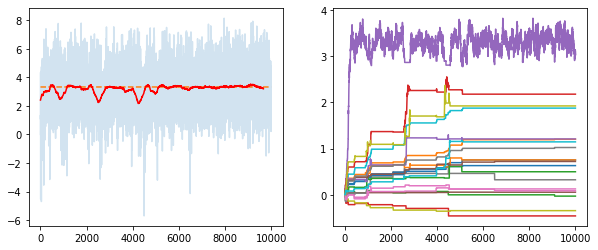

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

#Plotting Logic 
window = n_tries //30
plt.plot(rewards, alpha = 0.2);
plt.plot(rewards * 0 + np.max(bandit['mus']), '--');
smoothed = np.convolve(rewards, np.ones(window)/window, mode='valid')
plt.plot(smoothed,'r')

plt.subplot(1,2,2);
plt.plot(all_values);

# Minimum Q-Learning Example

In [ ]:
# Create basic gridworld environment
def create_env(size = 10, noise = 0):
  agent_position = np.array([0,0])
  goal = np.array([size-1, size-1])
  trap = np.array([6,6])
  # Action encoding: up / down / left-right
  actions =[[1,0],[-1,0],[0,-1], [0,1]]
  env = {'agent_position':agent_position, 'goal':goal, 'trap': trap, 'size':size, 'actions': actions, 'noise': noise }
  return env

def reset(env):
  env['agent_position'] = np.array([0,0])
  return env['agent_position']

# Define environment dynamics
def step( env, action ):
  # With probability 'noise' we randomly replace the action
  if np.random.uniform() < env['noise']:
    action = np.random.randint(0, 4)
  env['agent_position'] =  np.clip(env['agent_position'] + env['actions'][action], 0, env['size'] - 1)
  reward = -1
  done = False
  # Reward computation
  if np.array_equal(env['agent_position'], env['trap']):
    reward = -10
  if np.array_equal(env['agent_position'], env['goal']):
    reward = 10
    done = True
  return reward, env['agent_position'], done

In [ ]:
# Create env
env = create_env(noise = 0.0)
max_length = 100
gamma = 0.99
n_episodes = 5000


# Action selection logic
def action_selection(q_values, chosen, s, method = 'greedy'):
  values = q_values[s[0], s[1]]
  if method == 'greedy':
    return np.argmax(values)
  if method == 'ucb':
    # YOUR CODE HERE
    return 0 # Fixme
  if method == 'eps':
    # YOUR CODE HERE
    return 0 # Fixme

# Value logic
values = np.zeros([env['size'], env['size']])
q_values = np.zeros([env['size'], env['size'],4])
chosen = np.ones([env['size'], env['size'],4])

# Learning Logic
alpha = 0.5

# run episode
rewards = np.zeros( n_episodes )
for e in range( n_episodes ):
  s = reset(env)
  for t in range( max_length ):
    action = action_selection( q_values, chosen, s, 'eps' )
    chosen[s[0], s[1], action ] += 1
    r, s_prime, done = step(env, action)
    rewards[e] += r # log rewards
    
    # YOUR CODE HERE
    td_error = 0 #  Fixme
    values[s[0], s[1]] += alpha * td_error
    td_error = 0 # Fixme
    q_values[s[0], s[1], action] += alpha * td_error
    s = s_prime
    if done:
      break

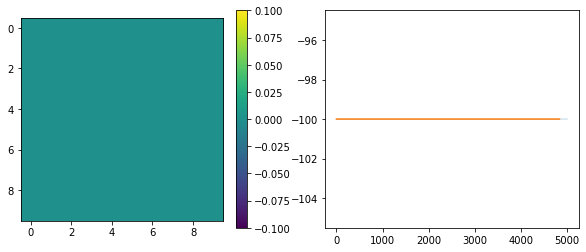

In [ ]:
# Plotting logic
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(values)
plt.colorbar()

plt.subplot(1,2,2)
plt.plot(rewards, alpha = 0.2)
window = n_episodes // 30
smoothed = np.convolve(rewards, np.ones(window)/window, mode='valid')
plt.plot(smoothed)

None